# IR

### Prac-1

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

In [2]:
corpus = ["HI! this is Nikhil Ingale.", "Currently pursuing Bachelors degree in AI&DS.", "My College is D.Y.Patil Institute of Technology, Pimpri."]
corpus

['HI! this is Nikhil Ingale.',
 'Currently pursuing Bachelors degree in AI&DS.',
 'My College is D.Y.Patil Institute of Technology, Pimpri.']

In [13]:
def preprocess(doc):
    doc = doc.lower()
    clean_doc = re.sub(r"[^a-zA-Z0-9]", " ", doc)
    tokens = word_tokenize(clean_doc)
    stop_words = stopwords.words('english')
    clean_tokens = [ token for token in tokens if token not in stop_words]

    return clean_tokens

In [14]:
processed_corpus = []
for doc in corpus:
    processed_corpus.append(preprocess(doc))

processed_corpus

[['hi', 'nikhil', 'ingale'],
 ['currently', 'pursuing', 'bachelors', 'degree', 'ai', 'ds'],
 ['college', 'patil', 'institute', 'technology', 'pimpri']]

In [16]:
stemmed_tokens = []
stemmer = PorterStemmer()
for doc in processed_corpus:
    temp = []
    for token in doc:
        stemmed_word = stemmer.stem(token)
        temp.append(stemmed_word)
    stemmed_tokens.append(temp)

stemmed_tokens
        

[['hi', 'nikhil', 'ingal'],
 ['current', 'pursu', 'bachelor', 'degre', 'ai', 'ds'],
 ['colleg', 'patil', 'institut', 'technolog', 'pimpri']]

In [31]:
lemma_tokens = []
lemmatizer = WordNetLemmatizer()
for doc in processed_corpus:
    temp = []
    for token in doc:
        lemma_word = lemmatizer.lemmatize(token)
        temp.append(lemma_word)

    lemma_tokens.append(temp)

lemma_tokens

# OR
# [[lemmatizer.lemmatize(word) for word in doc] for doc in processed_corpus ]

[['hi', 'nikhil', 'ingale'],
 ['currently', 'pursuing', 'bachelor', 'degree', 'ai', 'd'],
 ['college', 'patil', 'institute', 'technology', 'pimpri']]

## Prac-2

In [19]:
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [20]:
corpus = {
    1: "This is the first document. It contains some text.",
    2: "The second document is longer. It also contains some text.",
    3: "This is the third document. It is different from the first two.",
}

In [21]:
stop_words = stopwords.words('english')
def preprocess(doc):
    doc = doc.lower()
    clean_doc = re.sub(r'[^A-Za-z0-9]', " ", doc)
    tokens = word_tokenize(clean_doc)
    clean_tokens = [token for token in tokens if token not in stop_words]

    return clean_tokens

In [22]:
inverted_index = defaultdict(list)
def create_index():
    for ind, doc in corpus.items():
        tokens = preprocess(doc)
        for token in tokens:
            inverted_index[token].append(ind)

In [23]:
create_index()
inverted_index

defaultdict(list,
            {'first': [1, 3],
             'document': [1, 2, 3],
             'contains': [1, 2],
             'text': [1, 2],
             'second': [2],
             'longer': [2],
             'also': [2],
             'third': [3],
             'different': [3],
             'two': [3]})

In [34]:
def process_query(query):
    tokens = preprocess(query)
    matched_docid = set()
    matched_docs = list()

    for token in tokens:
        if token in inverted_index:
            matched_docid.update(inverted_index[token])

    for doc_id in matched_docid:
        matched_docs.append(corpus[doc_id])

    return list(matched_docid), matched_docs

In [36]:
query = 'first document is good'
doc_id, docs = process_query(query)

for id, doc in zip(doc_id, docs):
    print(f"matched doc{id} : {doc} ")

matched doc1 : This is the first document. It contains some text. 
matched doc2 : The second document is longer. It also contains some text. 
matched doc3 : This is the third document. It is different from the first two. 


## Prac-3

In [73]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [74]:
df = pd.read_csv('dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [75]:
df.shape

(1025, 14)

In [76]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [79]:
model = BayesianNetwork(
    [('age','target'),
    ('sex','cp'),
    ('cp','target'),
    ('trestbps','target'),
    ('chol','target')]
)

In [80]:
model.fit(data=df, estimator=MaximumLikelihoodEstimator)

In [81]:
model.nodes

NodeView(('age', 'target', 'sex', 'cp', 'trestbps', 'chol'))

In [82]:
heartdiseasinfer = VariableElimination(model)

In [89]:
q1 = heartdiseasinfer.query(variables=['target'], evidence={'age':70})
print(q1)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5002 |
+-----------+---------------+
| target(1) |        0.4998 |
+-----------+---------------+


In [90]:
q1 = heartdiseasinfer.query(variables=['target'], evidence={'cp':3})
print(q1)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4999 |
+-----------+---------------+
| target(1) |        0.5001 |
+-----------+---------------+


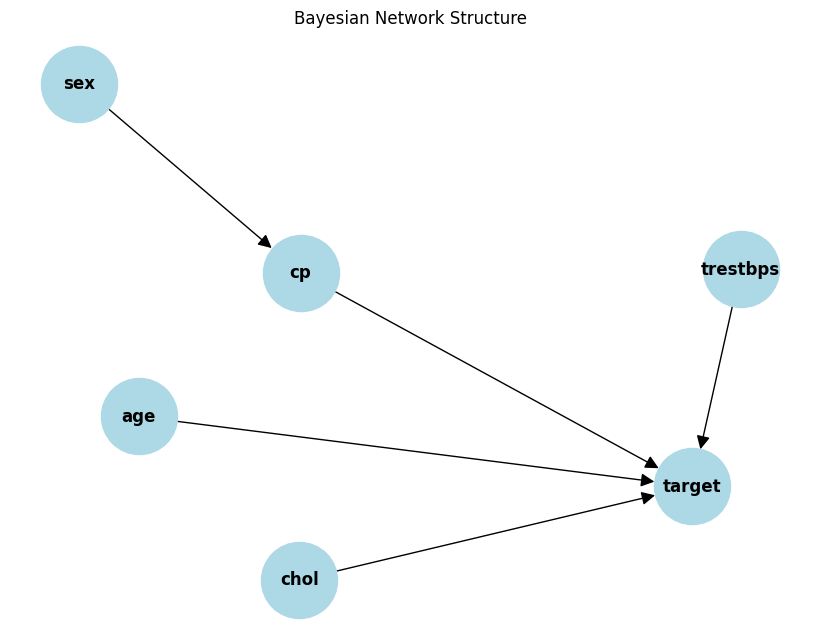

In [94]:
import matplotlib.pyplot as plt
import networkx as nx
graph = nx.DiGraph()
graph.add_edges_from(model.edges())

plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
plt.title("Bayesian Network Structure")
plt.show()

## Prac-4

In [146]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sbn
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('dataset/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [98]:
df.drop(columns=['Unnamed: 0', 'label'], inplace=True)

In [99]:
df.isna().sum()

text         0
label_num    0
dtype: int64

In [101]:
stop_words = stopwords.words('english')
def preprocess(doc):
    doc = doc.lower()
    clean_doc = re.sub(r'[^A-Za-z0-9]', " ", doc)
    tokens = word_tokenize(clean_doc)
    clean_tokens = [token for token in tokens if token not in stop_words]

    return " ".join(clean_tokens)

In [105]:
df['clean_text'] = df['text'].apply(preprocess)

In [112]:
df.drop(columns=['text'], inplace=True)
df.head()

,label_num,clean_text
0,0,subject enron methanol meter 988291 follow not...
1,0,subject hpl nom january 9 2001 see attached fi...
2,0,subject neon retreat ho ho ho around wonderful...
3,1,subject photoshop windows office cheap main tr...
4,0,subject indian springs deal book teco pvr reve...


In [114]:
X = df.iloc[:,1]
y = df.iloc[:,0]

In [115]:
vectorizer = CountVectorizer()
X_vectors = vectorizer.fit_transform(X)

In [130]:
X_vectors.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [134]:
pd.DataFrame(data=X_vectors.toarray(), columns=vectorizer.get_feature_names_out())

,00,000,0000,000000,000000000002858,000000000049773,000080,000099,0001,00018,00020608,0004,0005,0008,001,0010,001001,0012,001452,002,0022,00221,0025,0027,0028,0029,00298,003,0030,003002,0031,0033,0038,004,0042,0043,0044,0045,0046,0047,0049,005,00501723,0051,00534580,006,006600,0067,007,0071,0074,008,0080,0085201238,009,0090,01,010,0100,0101,...,zu,zufferli,zugpju,zui,zuid,zuidholland,zuk,zukin,zum,zunnw,zupymv,zur,zurich,zusagen,zusammenhang,zustande,zustellung,zux,zuybzbq,zuyjzb,zv,zve,zvikydqu,zvjc,zvp,zvrkxjmex,zvx,zw,zwallet,zwdm,zwftnqlp,zwiers,zwmdjvr,zwoegen,zwu,zxaghur,zxgwvpiadobe,zxgwvpihere,zxgwvpiimg,zxgwvpimacromedia,zxgwvpimicrosoft,zxgwvpinorton,zxjcxz,zxklh,zxzmcnbf,zyban,zyjvit,zykfe,zyl,zynsdirnh,zynve,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5167,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzocb', 'zzso', 'zzsyt'], dtype=object)

In [124]:
vectorizer.vocabulary_

{'subject': 43460,
 'enron': 18681,
 'methanol': 30965,
 'meter': 30958,
 '988291': 4629,
 'follow': 20811,
 'note': 33135,
 'gave': 21723,
 'monday': 31652,
 '00': 0,
 'preliminary': 36594,
 'flow': 20700,
 'data': 15260,
 'provided': 37137,
 'daren': 15203,
 'please': 35965,
 'override': 34399,
 'pop': 36225,
 'daily': 15105,
 'volume': 47754,
 'presently': 36659,
 'zero': 50029,
 'reflect': 38561,
 'activity': 5142,
 'obtain': 33475,
 'gas': 21668,
 'control': 13915,
 'change': 11884,
 'needed': 32545,
 'asap': 7233,
 'economics': 17860,
 'purposes': 37381,
 'hpl': 24427,
 'nom': 33012,
 'january': 26598,
 '2001': 1116,
 'see': 40897,
 'attached': 7517,
 'file': 20340,
 'hplnol': 24434,
 '09': 214,
 'xls': 49394,
 'neon': 32611,
 'retreat': 39214,
 'ho': 24085,
 'around': 7130,
 'wonderful': 48869,
 'time': 45080,
 'year': 49647,
 'leaders': 28549,
 'know': 27874,
 'extremely': 19704,
 'hectic': 23597,
 'tough': 45447,
 'think': 44862,
 'anything': 6692,
 'past': 34858,
 'holidays':

In [140]:
X_train, X_test, y_train, y_test= train_test_split(X_vectors, y, test_size=0.2, random_state=100)

In [141]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [143]:
y_pred = model.predict(X_test)

In [145]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[712,  13],
       [ 10, 300]])

<Axes: >

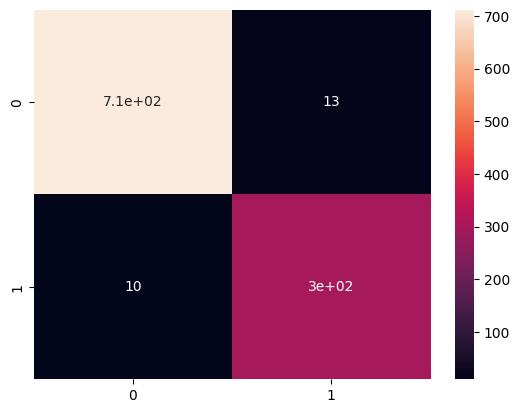

In [147]:
sbn.heatmap(cm, annot=True)

In [149]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       722
           1       0.97      0.96      0.96       313

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



## Prac-5

In [150]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [151]:
iris = load_iris()
X = iris.data
y = iris.target

In [152]:
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

In [154]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [156]:
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = agg_cluster.fit_predict(X_pca)

In [157]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

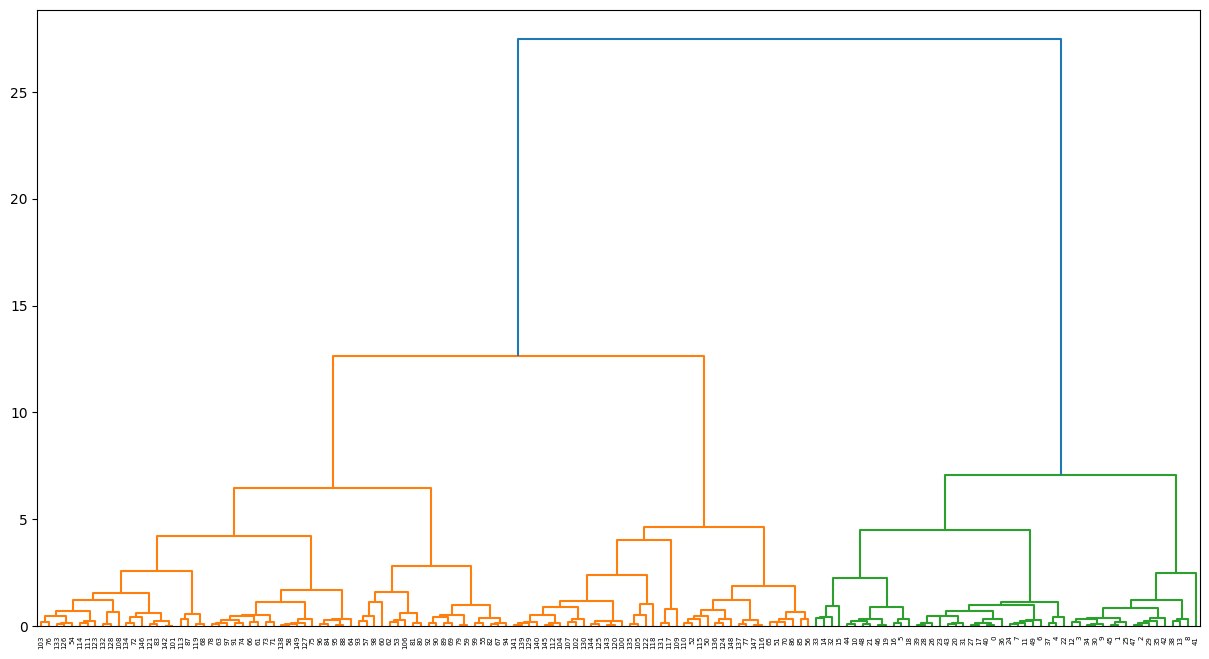

In [178]:
linked = linkage(X_pca, 'ward')
plt.figure(figsize=(15,8))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.show()

<Axes: >

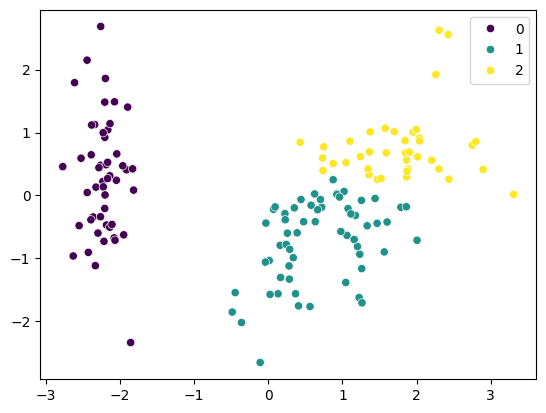

In [176]:
sbn.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='viridis')

# QAI

## Prac-1

In [2]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account('e69b34162feb7f4676fa93dbcbd4ede189df708086bf35ba9bd859d60a10bb4ebdb142f6dfc746ad4fd72ce12e4d65f01cb63220fa8bb413b8aa5cd7f09bc389', overwrite=True)

C:\Users\swapn\AppData\Local\Temp\ipykernel_33272\3265151891.py:1: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


In [3]:
from qiskit import QuantumCircuit, execute
from qiskit.visualization import circuit_drawer

In [4]:
circuit = QuantumCircuit(16,16)

In [5]:
circuit.h(range(16))

In [6]:
circuit.measure(range(16), range(16))

In [7]:
print(circuit)

      ┌───┐┌─┐                                             
 q_0: ┤ H ├┤M├─────────────────────────────────────────────
      ├───┤└╥┘┌─┐                                          
 q_1: ┤ H ├─╫─┤M├──────────────────────────────────────────
      ├───┤ ║ └╥┘┌─┐                                       
 q_2: ┤ H ├─╫──╫─┤M├───────────────────────────────────────
      ├───┤ ║  ║ └╥┘┌─┐                                    
 q_3: ┤ H ├─╫──╫──╫─┤M├────────────────────────────────────
      ├───┤ ║  ║  ║ └╥┘┌─┐                                 
 q_4: ┤ H ├─╫──╫──╫──╫─┤M├─────────────────────────────────
      ├───┤ ║  ║  ║  ║ └╥┘┌─┐                              
 q_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├──────────────────────────────
      ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐                           
 q_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
      ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
 q_7: ┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
      ├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐  

e:\Nikhil\7th sem lab ass\new_env\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


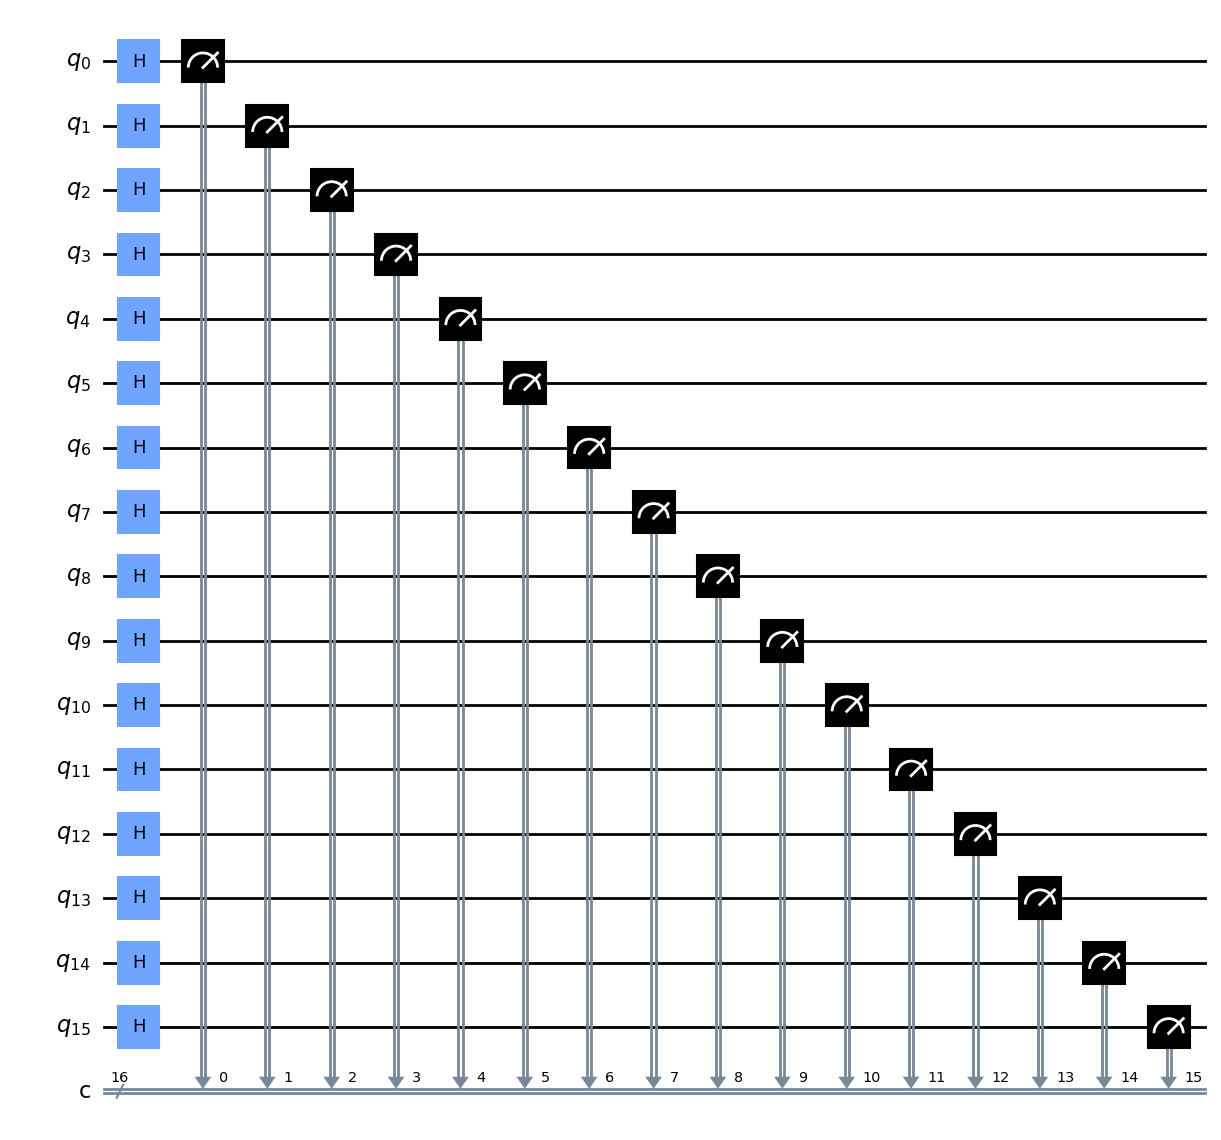

In [52]:
circuit_drawer(circuit, output='mpl')

In [8]:
provider = IBMProvider()
simulator = provider.get_backend('ibm_brisbane')

In [9]:
job = execute(circuit, simulator, shots=1)

In [10]:
result = job.result()

In [11]:
counts = result.get_counts(circuit)

In [12]:
counts

{'0111110011111110': 1}

In [13]:
# Extract the random number from the measurement outcome
random_number = int(list(counts.keys())[0], 2)

# Convert the random number to binary representation
binary_number = bin(random_number)[2:].zfill(16)

print("Random number (decimal):", random_number)
print("Random number (binary):", binary_number)

Random number (decimal): 31998
Random number (binary): 0111110011111110


#### New way

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit import QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [6]:
q = QuantumRegister(16, 'q')
c = ClassicalRegister(16, 'c')
circuit = QuantumCircuit(q, c)

In [7]:
circuit.h(q)
circuit.draw()
circuit.measure(q, c)
circuit.draw()

┌───┐┌─┐                                             
 q_0: ┤ H ├┤M├─────────────────────────────────────────────
      ├───┤└╥┘┌─┐                                          
 q_1: ┤ H ├─╫─┤M├──────────────────────────────────────────
      ├───┤ ║ └╥┘┌─┐                                       
 q_2: ┤ H ├─╫──╫─┤M├───────────────────────────────────────
      ├───┤ ║  ║ └╥┘┌─┐                                    
 q_3: ┤ H ├─╫──╫──╫─┤M├────────────────────────────────────
      ├───┤ ║  ║  ║ └╥┘┌─┐                                 
 q_4: ┤ H ├─╫──╫──╫──╫─┤M├─────────────────────────────────
      ├───┤ ║  ║  ║  ║ └╥┘┌─┐                              
 q_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├──────────────────────────────
      ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐                           
 q_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
      ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
 q_7: ┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
      ├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
 q_8: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
      ├───┤ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
 q_9: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
      ├───┤ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
q_10: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
      ├───┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
q_11: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
      ├───┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
q_12: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
      ├───┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
q_13: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
      ├───┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
q_14: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_15: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 16/══════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
            0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15

In [8]:
simulator = AerSimulator()

In [9]:
transpiled_circuit = transpile(circuit, simulator)
job = simulator.run(transpiled_circuit, shots=1)

In [11]:
print("Executing Job.....")
result = job.result()

Executing Job.....


In [12]:
counts = result.get_counts(circuit)
print("Result: ", counts)

Result:  {'0111111001101101': 1}


## Prac-2

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel,depolarizing_error

In [3]:
qc=QuantumCircuit(3,3)

qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2],[0,1,2])

In [4]:
noise_model = NoiseModel()

In [5]:
# Add depolarizing noise for single-qubit gates and two-qubit gates
depol_1q = depolarizing_error(0.01, 1)
depol_2q = depolarizing_error(0.02, 2)
noise_model.add_all_qubit_quantum_error(depol_1q, ['u3', 'x', 'h'])
noise_model.add_all_qubit_quantum_error(depol_2q, ['cx'])

In [6]:
# Use AerSimulator and noise model for simulation
backend = AerSimulator()

In [7]:
# Execute the quantum circuit with noise model
result_with_noise = backend.run(qc,noise_model=noise_model, shots=1024).result()

In [8]:
# Get the raw counts with noise
noisy_counts = result_with_noise.get_counts(qc)

In [9]:
# Simple mitigation technique: scale counts based on expected noise
mitigated_counts = {key: noisy_counts[key] * (1 - 0.02) for key in noisy_counts}

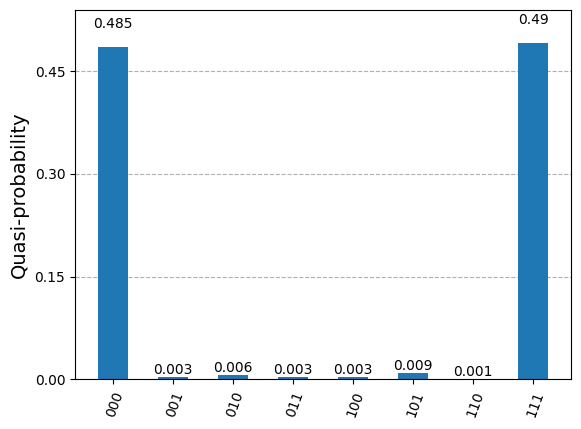

In [10]:
# Plot the mitigated results
plot_histogram(mitigated_counts)

In [11]:
print("Original counts:")
print(noisy_counts)

print("Mitigated counts:")
print(mitigated_counts)

Original counts:
{'000': 497, '111': 502, '010': 6, '001': 3, '011': 3, '101': 9, '100': 3, '110': 1}
Mitigated counts:
{'000': 487.06, '111': 491.96, '010': 5.88, '001': 2.94, '011': 2.94, '101': 8.82, '100': 2.94, '110': 0.98}


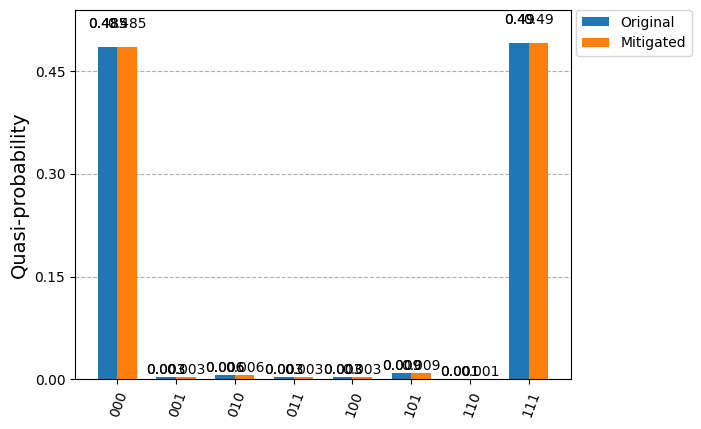

In [12]:
plot_histogram([noisy_counts, mitigated_counts], legend=['Original', 'Mitigated'])

## Prac-3

In [15]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,transpile
from qiskit.circuit.library import GroverOperator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def create_3_puzzle_circuit():
    """Create the quantum circuit for solving the 3-puzzle problem using Grover's algorithm."""
    # Initialize quantum and classical registers
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qr, cr)

    # Initial state |000>
    # CNOT gates to exchange positions of qubits
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])

    # Apply Hadamard gates to create superposition
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])

    # Placeholder for Grover's algorithm
    # This requires defining an oracle and the Grover operator
    # Here we use a simple placeholder to illustrate the concept
    oracle = QuantumCircuit(3)
    oracle.z(0)  # Example oracle condition (adjust based on the puzzle's rules)
    oracle_gate = oracle.to_gate(label="Oracle")

    # Grover operator
    grover_operator = GroverOperator(oracle)
    qc.append(grover_operator, qr)

    # Measurement
    qc.measure(qr, cr)
    return qc

In [17]:

# Create the 3-puzzle quantum circuit
qc = create_3_puzzle_circuit()

# Execute the circuit on a quantum simulator
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)

job = simulator.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Output the result
print("Measurement results from the 3-puzzle quantum circuit:")
print(counts)

Measurement results from the 3-puzzle quantum circuit:
{'101': 131, '011': 128, '111': 130, '110': 119, '000': 133, '010': 129, '100': 118, '001': 136}


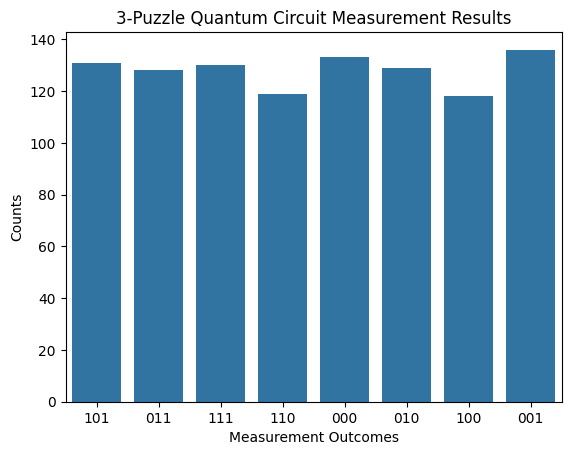

In [18]:
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('3-Puzzle Quantum Circuit Measurement Results')
plt.show()

## Prac-4

In [19]:

from qiskit.circuit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import transpile

In [20]:
circuit = QuantumCircuit(3, 3)

In [21]:
circuit.x(0)
circuit.barrier(range(3))
circuit.h(1)
circuit.cx(1, 2)
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier(range(3))
circuit.measure(range(2), range(2))
circuit.barrier(range(3))
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

In [22]:
backend = AerSimulator()
qc_compiled = transpile(circuit, backend)

In [23]:
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

In [24]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'010': 281, '000': 256, '001': 238, '011': 249}


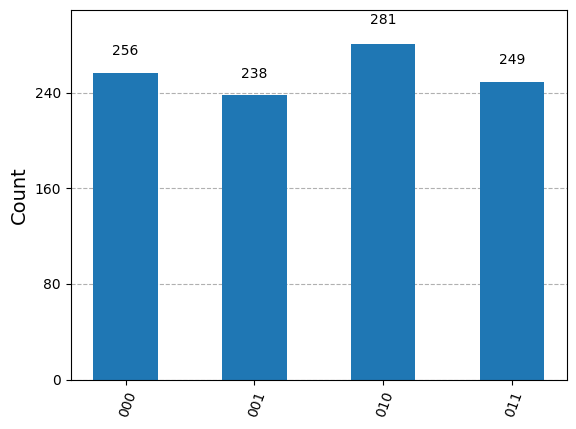

In [25]:
plot_histogram(counts)

## Prac-5

In [26]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator

In [27]:
from qiskit.circuit.library import QFT

In [29]:
# Set up the AerSimulator backend
simulator = AerSimulator()

In [30]:
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')
circuit = QuantumCircuit(q,c)

In [32]:
circuit = QuantumCircuit(q, c)
circuit.h(q) 


In [33]:
# Apply X gates to specific qubits (as per your original code)
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])

In [34]:

# Apply the Quantum Fourier Transform (QFT)
qft_circuit = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name="qft")
circuit.append(qft_circuit, q)

In [35]:
circuit = circuit.compose(qft_circuit)
circuit.measure(q,c) # Measure the qubits and store the result in classical register
circuit.draw()

┌───┐┌───┐┌──────┐┌──────┐┌─┐            
q_0: ┤ H ├┤ X ├┤0     ├┤0     ├┤M├────────────
     ├───┤└───┘│      ││      │└╥┘┌─┐         
q_1: ┤ H ├─────┤1     ├┤1     ├─╫─┤M├─────────
     ├───┤┌───┐│      ││      │ ║ └╥┘┌─┐      
q_2: ┤ H ├┤ X ├┤2 qft ├┤2 qft ├─╫──╫─┤M├──────
     ├───┤└───┘│      ││      │ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├─────┤3     ├┤3     ├─╫──╫──╫─┤M├───
     ├───┤┌───┐│      ││      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├┤ X ├┤4     ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└───┘└──────┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/═══════════════════════════╩══╩══╩══╩══╩═
                                0  1  2  3  4

In [37]:
transpiled_circuit = transpile(circuit, simulator)
job = simulator.run(transpiled_circuit,shots=1000)

In [38]:

print("Job is running...")
print(f"Final job status: {job.status()}")

Job is running...
Final job status: JobStatus.DONE


In [39]:
job_result = job.result()
counts = job_result.get_counts()
print("\n QFT Output")
print("-------------")
print(counts)


 QFT Output
-------------
{'01000': 31, '11110': 25, '00100': 20, '11100': 36, '00010': 29, '01001': 29, '11000': 20, '11101': 39, '10101': 26, '11011': 39, '11010': 34, '00011': 36, '01110': 34, '10100': 31, '10110': 41, '01101': 29, '10010': 33, '00101': 27, '01111': 33, '00001': 37, '10011': 36, '11111': 29, '00111': 40, '10111': 26, '00110': 27, '10000': 37, '00000': 32, '01011': 27, '01010': 36, '11001': 29, '10001': 25, '01100': 27}
